# import libraries

In [1]:
# !pip install pingouin
# !pip install openpyxl
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import DescrStatsW
import pandas as pd
import pingouin as pg
from statsmodels.stats.weightstats import DescrStatsW

In [31]:

def bland_altman_plot(manual_counts, model_predictions, title="Bland–Altman Plot"):
    """
    Generate a Bland–Altman plot and calculate bias with confidence intervals (CI95%).

    Parameters:
    - manual_counts: Array of manual counts (ground truth).
    - model_predictions: Array of model predictions.
    - title: Title of the plot.
    """
    # Calculate mean and differences
    avg = (manual_counts + model_predictions) / 2.0
    diff = manual_counts - model_predictions
    bias = np.mean(diff)
    std_diff = np.std(diff, ddof=1)

    # Calculate CI95% for bias
    n = len(diff)
    ci95_lower = bias - 1.96 * (std_diff / np.sqrt(n))
    ci95_upper = bias + 1.96 * (std_diff / np.sqrt(n))

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(avg, diff, color="blue", alpha=0.6, label="Differences")
    plt.axhline(bias, color="red", linestyle="--", label=f"Bias: {bias:.2f}")
    plt.axhline(ci95_lower, color="green", linestyle="--", label=f"CI95%: [{ci95_lower:.2f}, {ci95_upper:.2f}]")
    plt.axhline(ci95_upper, color="green", linestyle="--")
    plt.xlabel("Average of Manual and Model Counts")
    plt.ylabel("Difference (Manual - Model)")
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Print results
    print(f"Bias: {bias:.2f}")
    print(f"CI95%: [{ci95_lower:.2f}, {ci95_upper:.2f}]")


# Sample

In [2]:


# Example data (replace with your actual data)
data = {
    'Image': [1, 2, 3],
    'Ground Truth': [45, 32, 60],
    'Model 1 Prediction': [44, 31, 59],
    'Model 2 Prediction': [46, 33, 61],
    'Model 3 Prediction': [43, 34, 62]
}
df = pd.DataFrame(data)

# Melt the data for ICC calculation
df_melted = df.melt(id_vars='Image', var_name='Rater', value_name='Score')

# Calculate ICC
icc = pg.intraclass_corr(data=df_melted, targets='Image', raters='Rater', ratings='Score')

# Show ICC results
print(icc)


    Type              Description       ICC      F  df1  df2          pval  \
0   ICC1   Single raters absolute  0.991607  473.6    2    9  7.614159e-10   
1   ICC2     Single random raters  0.991611  592.0    2    6  1.281778e-07   
2   ICC3      Single fixed raters  0.993277  592.0    2    6  1.281778e-07   
3  ICC1k  Average raters absolute  0.997889  473.6    2    9  7.614159e-10   
4  ICC2k    Average random raters  0.997889  592.0    2    6  1.281778e-07   
5  ICC3k     Average fixed raters  0.998311  592.0    2    6  1.281778e-07   

         CI95%  
0  [0.95, 1.0]  
1  [0.95, 1.0]  
2  [0.95, 1.0]  
3  [0.99, 1.0]  
4  [0.99, 1.0]  
5  [0.99, 1.0]  


# read datasets

In [3]:
address= 'C:/Users/narges/PycharmProjects3/pythonProject3/IEEE_transaction_paper/all_methodology_comparings/'
file_name= ['compare_local_maxima_real_synth_lightunet_unet.xlsx' , 'compare_cca_real_synth_unet_light_unet.xlsx' , 'compare_Watershed1_synth_real_unet_lightunet.xlsx']
data_local_maxima= pd.read_excel(address+ file_name[0])
data_cca= pd.read_excel(address+ file_name[1])
data_watershed= pd.read_excel(address+ file_name[2])


# light unet real CCI

In [4]:
images_name= data_local_maxima.iloc[1:,0].dropna()
ground_truths=data_local_maxima.iloc[1:,1].dropna()
#          light-u-net lm cca watershed
model_lm =  data_local_maxima.iloc[1:,4].dropna()
model_cca =  data_cca.iloc[3:83,1].dropna()
model_watershed = data_watershed.iloc[: , 14].dropna()


In [5]:
images_name.shape , ground_truths.shape , model_lm.shape , model_cca.shape , model_watershed.shape

((80,), (80,), (80,), (80,), (80,))

In [6]:
data = {
    'Image': list(images_name),
    'operator':list(ground_truths),
    'model_1':list( model_lm) ,
    'model_2': list(model_cca),
    'model_3':list( model_watershed)
}
df = pd.DataFrame(data)

df['model_avg'] = df[['model_1', 'model_2', 'model_3']].mean(axis=1)


In [7]:
# Melt the DataFrame to long format
df_long = pd.melt(df, id_vars=["Image", "operator"], 
                  value_vars=["model_1", "model_2", "model_3", "model_avg"],
                  var_name="model", value_name="model_count")

# Calculate ICC
icc = pg.intraclass_corr(data=df_long, targets='operator', raters='model', ratings='model_count')

# Print the ICC results
print(icc)

    Type              Description       ICC           F  df1  df2  \
0   ICC1   Single raters absolute  0.970811  134.039336   73  222   
1   ICC2     Single random raters  0.970942  347.490756   73  219   
2   ICC3      Single fixed raters  0.988587  347.490756   73  219   
3  ICC1k  Average raters absolute  0.992540  134.039336   73  222   
4  ICC2k    Average random raters  0.992574  347.490756   73  219   
5  ICC3k     Average fixed raters  0.997122  347.490756   73  219   

            pval         CI95%  
0  1.532943e-150  [0.96, 0.98]  
1  2.549452e-193   [0.9, 0.99]  
2  2.549452e-193  [0.98, 0.99]  
3  1.532943e-150  [0.99, 0.99]  
4  2.549452e-193   [0.97, 1.0]  
5  2.549452e-193    [1.0, 1.0]  


In [8]:

# Now, calculate ICC for each model compared to the operator
# Use a long format, where each row is a single sample/model comparison
df_long = pd.melt(df, id_vars=["Image", "operator"], value_vars=["model_1", "model_2", "model_3"],
                  var_name="model", value_name="model_count")

# Calculate ICC
icc = pg.intraclass_corr(data=df_long, targets='operator', raters='model', ratings='model_count')
print(icc)

    Type              Description       ICC           F  df1  df2  \
0   ICC1   Single raters absolute  0.956534   67.019668   73  148   
1   ICC2     Single random raters  0.956918  173.745378   73  146   
2   ICC3      Single fixed raters  0.982930  173.745378   73  146   
3  ICC1k  Average raters absolute  0.985079   67.019668   73  148   
4  ICC2k    Average random raters  0.985215  173.745378   73  146   
5  ICC3k     Average fixed raters  0.994244  173.745378   73  146   

            pval         CI95%  
0   1.078487e-85  [0.94, 0.97]  
1  4.204644e-114  [0.79, 0.98]  
2  4.204644e-114  [0.98, 0.99]  
3   1.078487e-85  [0.98, 0.99]  
4  4.204644e-114  [0.92, 0.99]  
5  4.204644e-114   [0.99, 1.0]  


In [9]:
icc_file = './ICC_results/icc_light_unet_realvssynth_avg.csv'
# Add ICC values into a new DataFrame
icc_results = icc[["Type", "Description", "ICC", "F", "df1", "df2", "pval", "CI95%"]].copy()

# Save to a CSV or Excel file
icc_results.to_csv(icc_file, index=False)

# Print the DataFrame for verification
print("\nICC Results was saved.")
# print(icc_results)


ICC Results was saved.


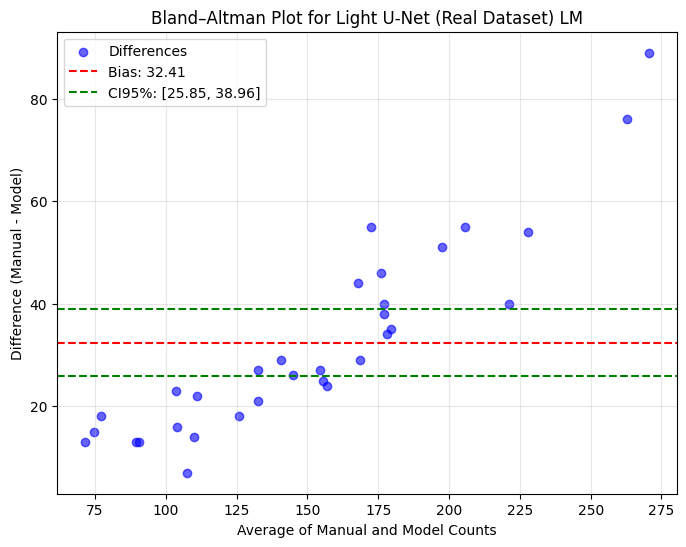

Bias: 32.41
CI95%: [25.85, 38.96]


In [33]:
# Example Usage
# Replace these with your actual data

# Call the function for Bland–Altman analysis
bland_altman_plot(ground_truths, model_lm, title="Bland–Altman Plot for Light U-Net (Real Dataset) LM")

# light unet synth CCI

In [10]:
images_name= data_local_maxima.iloc[1:,6].dropna()
ground_truths=data_local_maxima.iloc[1:,7].dropna()
#          light-u-net lm cca watershed
model_lm =  data_local_maxima.iloc[1:,10].dropna()
model_cca =  data_cca.iloc[3:83,7].dropna()
model_watershed = data_watershed.iloc[: , 6].dropna()


In [11]:
images_name.shape , ground_truths.shape , model_lm.shape , model_cca.shape , model_watershed.shape

((32,), (32,), (32,), (32,), (32,))

In [12]:
data = {
    'Image': list(images_name),
    'operator':list(ground_truths),
    'model_1':list( model_lm) ,
    'model_2': list(model_cca),
    'model_3':list( model_watershed)
}
df = pd.DataFrame(data)

df['model_avg'] = df[['model_1', 'model_2', 'model_3']].mean(axis=1)


In [13]:
# Melt the DataFrame to long format
df_long = pd.melt(df, id_vars=["Image", "operator"], 
                  value_vars=["model_1", "model_2", "model_3", "model_avg"],
                  var_name="model", value_name="model_count")

# Calculate ICC
icc = pg.intraclass_corr(data=df_long, targets='operator', raters='model', ratings='model_count')

# Print the ICC results
print(icc)

    Type              Description       ICC           F  df1  df2  \
0   ICC1   Single raters absolute  0.954449   84.812811   29   90   
1   ICC2     Single random raters  0.954729  185.883087   29   87   
2   ICC3      Single fixed raters  0.978823  185.883087   29   87   
3  ICC1k  Average raters absolute  0.988209   84.812811   29   90   
4  ICC2k    Average random raters  0.988284  185.883087   29   87   
5  ICC3k     Average fixed raters  0.994620  185.883087   29   87   

           pval         CI95%  
0  1.812453e-53  [0.92, 0.98]  
1  1.955579e-66  [0.86, 0.98]  
2  1.955579e-66  [0.96, 0.99]  
3  1.812453e-53  [0.98, 0.99]  
4  1.955579e-66   [0.96, 1.0]  
5  1.955579e-66   [0.99, 1.0]  


In [14]:

# Now, calculate ICC for each model compared to the operator
# Use a long format, where each row is a single sample/model comparison
df_long = pd.melt(df, id_vars=["Image", "operator"], value_vars=["model_1", "model_2", "model_3"],
                  var_name="model", value_name="model_count")

# Calculate ICC
icc = pg.intraclass_corr(data=df_long, targets='operator', raters='model', ratings='model_count')
print(icc)

    Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.932442  42.406406   29   60   
1   ICC2     Single random raters  0.933259  92.941543   29   58   
2   ICC3      Single fixed raters  0.968402  92.941543   29   58   
3  ICC1k  Average raters absolute  0.976419  42.406406   29   60   
4  ICC2k    Average random raters  0.976717  92.941543   29   58   
5  ICC3k     Average fixed raters  0.989241  92.941543   29   58   

           pval         CI95%  
0  3.745744e-30  [0.88, 0.96]  
1  8.244729e-39  [0.74, 0.98]  
2  8.244729e-39  [0.94, 0.98]  
3  3.745744e-30  [0.96, 0.99]  
4  8.244729e-39  [0.89, 0.99]  
5  8.244729e-39  [0.98, 0.99]  


In [15]:
# Check if the file exists and append or create a new one
import os
if os.path.exists(icc_file):
    # Load existing results
    icc_existing = pd.read_csv(icc_file)
    # Append new results
    icc_combined = pd.concat([icc_existing, icc], ignore_index=True)
else:
    # If file doesn't exist, start with the new results
    icc_combined = icc_new_results

# Save the combined results back to the file
icc_combined.to_csv(icc_file, index=False)

# Print the combined DataFrame for verification
print("\nUpdated ICC Results DataFrame.")



Updated ICC Results DataFrame.


# unet real

In [16]:
images_name= data_local_maxima.iloc[1:,0].dropna()
ground_truths=data_local_maxima.iloc[1:,1].dropna()
#          u-net lm cca watershed
model_lm =  data_local_maxima.iloc[1:,2].dropna()
model_cca =  data_cca.iloc[3:83,3].dropna()
model_watershed = data_watershed.iloc[: , 10].dropna()


In [17]:
images_name.shape , ground_truths.shape , model_lm.shape , model_cca.shape , model_watershed.shape

((80,), (80,), (80,), (80,), (80,))

In [18]:
data = {
    'Image': list(images_name),
    'operator':list(ground_truths),
    'model_1':list( model_lm) ,
    'model_2': list(model_cca),
    'model_3':list( model_watershed)
}
df = pd.DataFrame(data)

df['model_avg'] = df[['model_1', 'model_2', 'model_3']].mean(axis=1)


In [19]:
# Melt the DataFrame to long format
df_long = pd.melt(df, id_vars=["Image", "operator"], 
                  value_vars=["model_1", "model_2", "model_3", "model_avg"],
                  var_name="model", value_name="model_count")

# Calculate ICC
icc = pg.intraclass_corr(data=df_long, targets='operator', raters='model', ratings='model_count')

# Print the ICC results
print(icc)

    Type              Description       ICC            F  df1  df2  \
0   ICC1   Single raters absolute  0.989767   387.884600   73  222   
1   ICC2     Single random raters  0.989785  1349.847428   73  219   
2   ICC3      Single fixed raters  0.997043  1349.847428   73  219   
3  ICC1k  Average raters absolute  0.997422   387.884600   73  222   
4  ICC2k    Average random raters  0.997427  1349.847428   73  219   
5  ICC3k     Average fixed raters  0.999259  1349.847428   73  219   

            pval         CI95%  
0  7.776246e-201  [0.99, 0.99]  
1  1.880161e-257   [0.95, 1.0]  
2  1.880161e-257    [1.0, 1.0]  
3  7.776246e-201    [1.0, 1.0]  
4  1.880161e-257   [0.99, 1.0]  
5  1.880161e-257    [1.0, 1.0]  


In [20]:

# Now, calculate ICC for each model compared to the operator
# Use a long format, where each row is a single sample/model comparison
df_long = pd.melt(df, id_vars=["Image", "operator"], value_vars=["model_1", "model_2", "model_3"],
                  var_name="model", value_name="model_count")

# Calculate ICC
icc = pg.intraclass_corr(data=df_long, targets='operator', raters='model', ratings='model_count')
print(icc)

    Type              Description       ICC           F  df1  df2  \
0   ICC1   Single raters absolute  0.984689  193.942300   73  148   
1   ICC2     Single random raters  0.984745  674.923714   73  146   
2   ICC3      Single fixed raters  0.995568  674.923714   73  146   
3  ICC1k  Average raters absolute  0.994844  193.942300   73  148   
4  ICC2k    Average random raters  0.994863  674.923714   73  146   
5  ICC3k     Average fixed raters  0.998518  674.923714   73  146   

            pval         CI95%  
0  6.347735e-119  [0.98, 0.99]  
1  9.997866e-157  [0.88, 0.99]  
2  9.997866e-157   [0.99, 1.0]  
3  6.347735e-119   [0.99, 1.0]  
4  9.997866e-157   [0.96, 1.0]  
5  9.997866e-157    [1.0, 1.0]  


In [21]:
icc_file = './ICC_results/icc_unet_realvssynth_avg.csv'
# Add ICC values into a new DataFrame
icc_results = icc[["Type", "Description", "ICC", "F", "df1", "df2", "pval", "CI95%"]].copy()

# Save to a CSV or Excel file
icc_results.to_csv(icc_file, index=False)

# Print the DataFrame for verification
print("\nICC Results was saved.")
# print(icc_results)


ICC Results was saved.


# unet synth

In [22]:
images_name= data_local_maxima.iloc[1:,6].dropna()
ground_truths=data_local_maxima.iloc[1:,7].dropna()
#          light-u-net lm cca watershed
model_lm =  data_local_maxima.iloc[1:,8].dropna()
model_cca =  data_cca.iloc[3:83,9].dropna()
model_watershed = data_watershed.iloc[: , 2].dropna()


In [23]:
images_name.shape , ground_truths.shape , model_lm.shape , model_cca.shape , model_watershed.shape

((32,), (32,), (32,), (32,), (32,))

In [24]:
data = {
    'Image': list(images_name),
    'operator':list(ground_truths),
    'model_1':list( model_lm) ,
    'model_2': list(model_cca),
    'model_3':list( model_watershed)
}
df = pd.DataFrame(data)

df['model_avg'] = df[['model_1', 'model_2', 'model_3']].mean(axis=1)


In [25]:
# Melt the DataFrame to long format
df_long = pd.melt(df, id_vars=["Image", "operator"], 
                  value_vars=["model_1", "model_2", "model_3", "model_avg"],
                  var_name="model", value_name="model_count")

# Calculate ICC
icc = pg.intraclass_corr(data=df_long, targets='operator', raters='model', ratings='model_count')

# Print the ICC results
print(icc)

    Type              Description       ICC           F  df1  df2  \
0   ICC1   Single raters absolute  0.984158  249.500427   29   90   
1   ICC2     Single random raters  0.984185  431.969032   29   87   
2   ICC3      Single fixed raters  0.990804  431.969032   29   87   
3  ICC1k  Average raters absolute  0.995992  249.500427   29   90   
4  ICC2k    Average random raters  0.995999  431.969032   29   87   
5  ICC3k     Average fixed raters  0.997685  431.969032   29   87   

           pval         CI95%  
0  5.844008e-74  [0.97, 0.99]  
1  3.844255e-82  [0.96, 0.99]  
2  3.844255e-82   [0.98, 1.0]  
3  5.844008e-74   [0.99, 1.0]  
4  3.844255e-82   [0.99, 1.0]  
5  3.844255e-82    [1.0, 1.0]  


In [26]:

# Now, calculate ICC for each model compared to the operator
# Use a long format, where each row is a single sample/model comparison
df_long = pd.melt(df, id_vars=["Image", "operator"], value_vars=["model_1", "model_2", "model_3"],
                  var_name="model", value_name="model_count")

# Calculate ICC
icc = pg.intraclass_corr(data=df_long, targets='operator', raters='model', ratings='model_count')
print(icc)

    Type              Description       ICC           F  df1  df2  \
0   ICC1   Single raters absolute  0.976331  124.750213   29   60   
1   ICC2     Single random raters  0.976410  215.984516   29   58   
2   ICC3      Single fixed raters  0.986238  215.984516   29   58   
3  ICC1k  Average raters absolute  0.991984  124.750213   29   60   
4  ICC2k    Average random raters  0.992011  215.984516   29   58   
5  ICC3k     Average fixed raters  0.995370  215.984516   29   58   

           pval         CI95%  
0  1.253914e-43  [0.96, 0.99]  
1  3.284291e-49  [0.92, 0.99]  
2  3.284291e-49  [0.97, 0.99]  
3  1.253914e-43   [0.99, 1.0]  
4  3.284291e-49   [0.97, 1.0]  
5  3.284291e-49   [0.99, 1.0]  


In [27]:
# Check if the file exists and append or create a new one
import os
if os.path.exists(icc_file):
    # Load existing results
    icc_existing = pd.read_csv(icc_file)
    # Append new results
    icc_combined = pd.concat([icc_existing, icc], ignore_index=True)
else:
    # If file doesn't exist, start with the new results
    icc_combined = icc_new_results

# Save the combined results back to the file
icc_combined.to_csv(icc_file, index=False)

# Print the combined DataFrame for verification
print("\nUpdated ICC Results DataFrame.")



Updated ICC Results DataFrame.


# Bland–Altman